## Business Case:

FicZon Inc, a leading IT solutions provider, is experiencing a decline in sales due to growing competition and reliance on manual, inconsistent lead categorization processes that delay real-time sales actions. To address this, FicZon plans to implement a Machine Learning model that automatically categorizes leads as High Potential or Low Potential at the time of their creation. This initiative will involve detailed data exploration to understand key factors driving sales effectiveness and build a predictive model to prioritize leads more accurately. By automating lead evaluation, FicZon aims to improve conversion rates, increase sales efficiency, reduce manual errors, and enhance its competitive edge in a rapidly evolving market.

## Data overview:


Total Records: 7422

Features (Columns): 9

Primary Data Columns:

Created: (Lead Creation Date)

Product_ID: (ID of the Product Interested)

Source: (Lead Source, e.g., Website, Referral)

Mobile: (Customer Mobile Contact)

EMAIL: (Customer Email Contact)

Sales_Agent: (Assigned Sales Agent)

Location: (Lead Location)

Delivery_Mode: (Delivery Preference)

Status: (Current Status) 



### Importing Libraries:

In [6]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install pymysql

In [8]:
import pymysql
print('pymysql installed successfully')

pymysql installed successfully


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset:

In [11]:
host="Security_purpose"
user="Security_purpose"
password="Security_purpose"
database="Security_purpose"
conn=pymysql.connect(host=host,user=user,password=password,database=database)
query="SELECT * FROM data"
df=pd.read_sql(query,conn)
conn.close()

In [12]:
# Loading the dataset
df.to_csv("data.CSV",index=False)

In [13]:
# Viewing the data after loading the data
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [14]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


## Basic Checks:

In [16]:
df.shape

(7422, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [18]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

## Data Preprocessing

### Handling missing values

In [21]:
# Display the unique values in each column
for i in df.columns:
    print(i,':')
    print(df[i].unique())
    print(f"Total no.of unique values of {i} are :{len(df[i].unique())}")
    print('*'*50)

Created :
['14-11-2018 10:05' '14-11-2018 09:22' '14-11-2018 09:21' ...
 '28-04-2018 09:20' '28-04-2018 08:04' '28-04-2018 07:54']
Total no.of unique values of Created are :6752
**************************************************
Product_ID :
['' '9' '19' '18' '15' '27' '5' '2' '3' '25' '10' '20' '11' '21' '1' '12'
 '13' '17' '24' '26' '16' '23' '22' '8' '14' '6' '0' '28' '7' '4']
Total no.of unique values of Product_ID are :30
**************************************************
Source :
['Website' '' 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial']
Total no.of unique values of Source are :26
*************************


Several important fields like Product_ID, Source, Mobile, Email, Sales_Agent, and Location have missing (blank) entries.

Missing information in Sales_Agent and Source could impact model predictions, as these are critical for understanding how a lead flows into the system.

Strategy needed: Treat missing values carefully, by imputation method.


### 1.Product ID:  

In [24]:
df['Product_ID'].value_counts()

Product_ID
18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64

In [25]:
df['Product_ID'].unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [26]:
df['Product_ID'].replace({'': '18'}, inplace=True)

### 2. Source:  

In [28]:
df['Source'].value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name:

In [29]:
df['Source'].unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [30]:
# using mode imputation
Source = df['Source'].mode()[0]
print(Source)

Call


In [31]:
df['Source'].replace({'':'Call'}, inplace=True)

### 3. Sales Agent:

In [33]:
df['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: count, dtype: int64

In [34]:
df['Sales_Agent'].unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', '',
       'Sales-Agent-8', 'Sales-Agent-5', 'Sales-Agent-2',
       'Sales-Agent-12', 'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [35]:
# using mode imputation
Sales_Agent = df['Sales_Agent'].mode()[0]
print(Sales_Agent)

Sales-Agent-4


In [36]:
df['Sales_Agent'].replace({'':'Sales-Agent-4'}, inplace=True)

### 4. Location:

In [38]:
df['Location'].value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [39]:
df['Location'].unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [40]:
# using mode imputation
Location = df['Location'].mode()[0]
print(Location)

Other Locations


In [41]:
df['Location'].replace({'':'Other Locations'}, inplace=True)

### Dropping the column:

In [43]:
#dropping Mobile and Email column
df = df.drop(columns=['Mobile','EMAIL'])

High number of invalid entries, placeholders, and missing values in both mobile and email column.

Many entires have incorrect formats (special characters, alphabets, incomplete numbers).

Not reliable for lead categorization or predictive modeling without heavy data cleaning.

### Conversion of 'Created' Column to DateTime Format:

In [46]:
df['Created'] = pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M')

In [47]:
df['Year'] = df['Created'].dt.year
df['Month'] = df['Created'].dt.month
df['Day'] = df['Created'].dt.day
df['Hour'] = df['Created'].dt.hour
df['Minute'] = df['Created'].dt.minute
df['Weekday'] = df['Created'].dt.day_name()

In [48]:
columns = ['Year','Month', 'Day', 'Hour','Minute','Weekday']

for col in columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")

Unique values in Year:
[2018]


Unique values in Month:
[11 10  9  8  7  6  5  4]


Unique values in Day:
[14 13 12 11 10  9  8  7  6  5  4  3  2  1 31 30 29 28 27 26 25 24 23 22
 21 20 19 18 17 16 15]


Unique values in Hour:
[10  9  8  7  5  4  2 23 21 20 18 17 16 15 14 13 12 11 22 19  0  6  1  3]


Unique values in Minute:
[ 5 22 21 46 34 33 58 49 40  6  3 52 37 14 45 15 51 48 41 25  9 35 50 30
 16 11 53 26 56 29 28 27 20 10  8  7  0 18 43 55 38 23 19 17 31 13  1  4
 39 47 57 24 44 42 59 32 36 54 12  2]


Unique values in Weekday:
['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']




In [49]:
# Drop multiple columns
df = df.drop(['Created','Minute', 'Year'], axis=1)

### Inconsistent Data Formatting:

In [51]:
df['Status'].value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

Status field has entries like 'CONVERTED' and 'converted', indicating inconsistent case usage.

Such inconsistencies can split data unintentionally during model training, leading to poor performance. Apply standard formatting ( lowercase everything) across all categorical fields.


In [53]:
df['Status'] = df['Status'].str.lower()

## Data Visualization:

### Univarient Analysis:

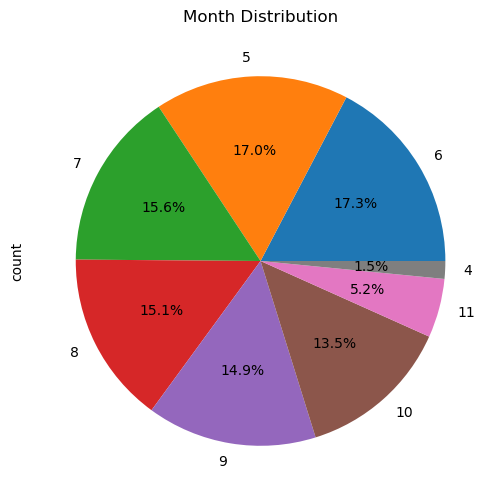

In [56]:
# Pie chart for Month
df['Month'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Month Distribution')
plt.show()

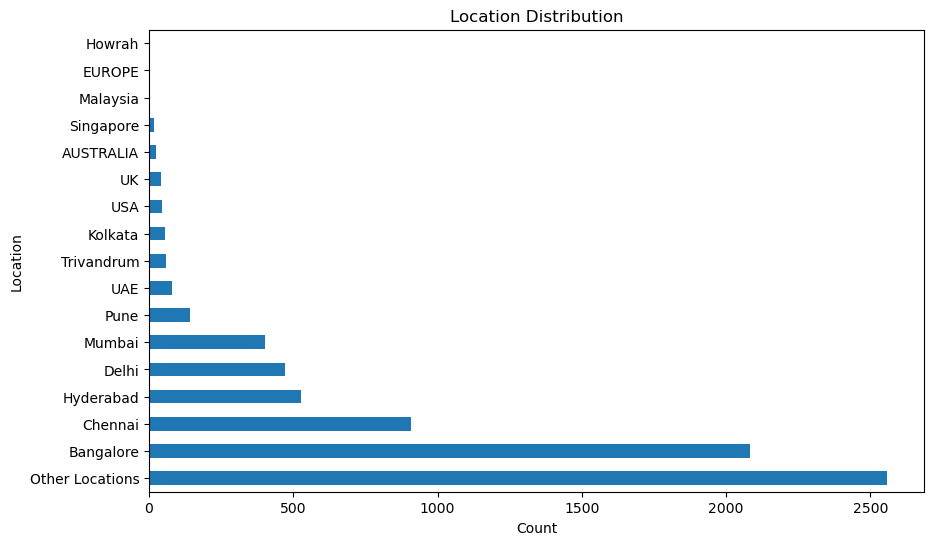

In [57]:
# Bar chart for Location distribution
df['Location'].value_counts().plot(kind='barh', figsize=(10,6))
plt.title('Location Distribution')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

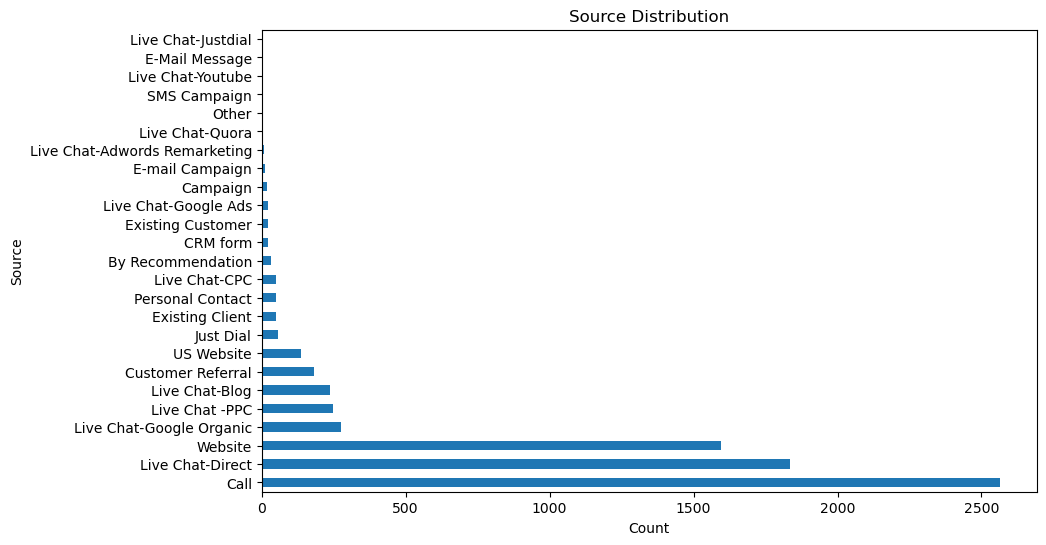

In [58]:
# Bar chart for source distribution
df['Source'].value_counts().plot(kind='barh', figsize=(10,6))
plt.title('Source Distribution')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()

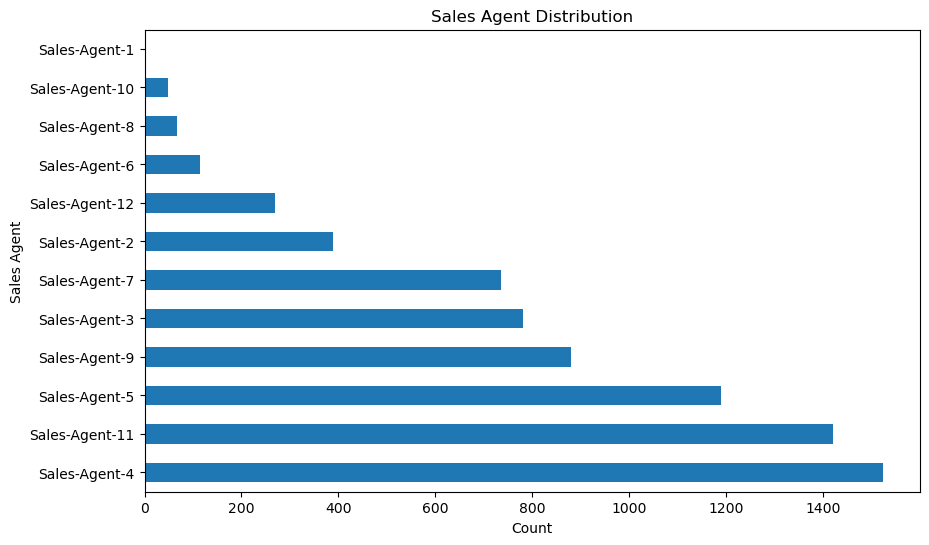

In [59]:
# Bar chart for sales Agent Distribution
df['Sales_Agent'].value_counts().plot(kind='barh', figsize=(10,6))
plt.title('Sales Agent Distribution')
plt.xlabel('Count')
plt.ylabel('Sales Agent')
plt.show()

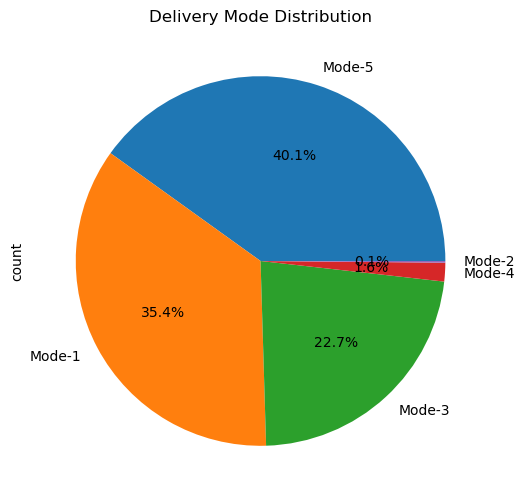

In [60]:
# Pie chart for Delivery mode distribution
df['Delivery_Mode'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Delivery Mode Distribution')
plt.show()

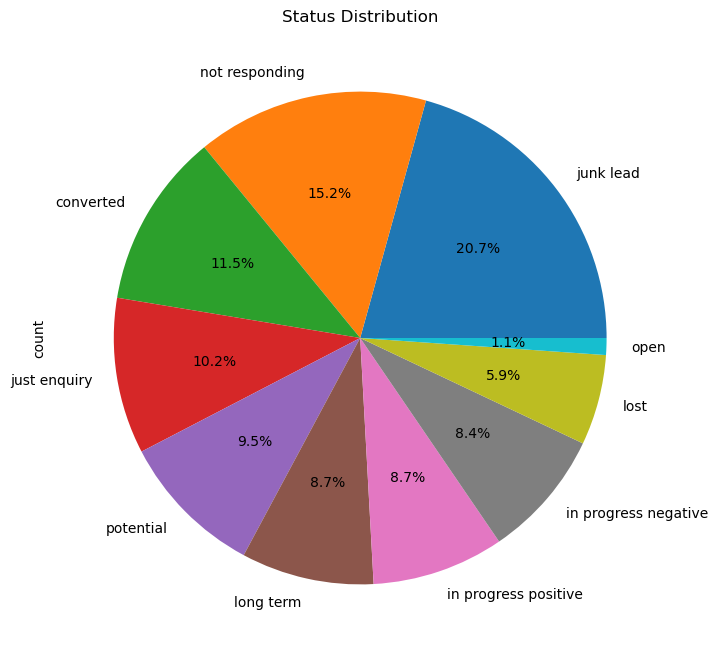

In [61]:
# Pie chart for status distribution
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title('Status Distribution')
plt.show()

### Conclusion:

A higher number of leads were created in May and June compared to other months.

Most of the leads are from other locations, followed by Bangalore.

The majority of leads were connected via phone calls.

Sales agents 4 and 11 generated more leads compared to others.

Most of the lead statuses are marked as junk.

### Bivarient Analysis:

In [65]:
# Checking the relationship of month columns with status variable
Mon_status = pd.crosstab(df['Month'], df['Status'])

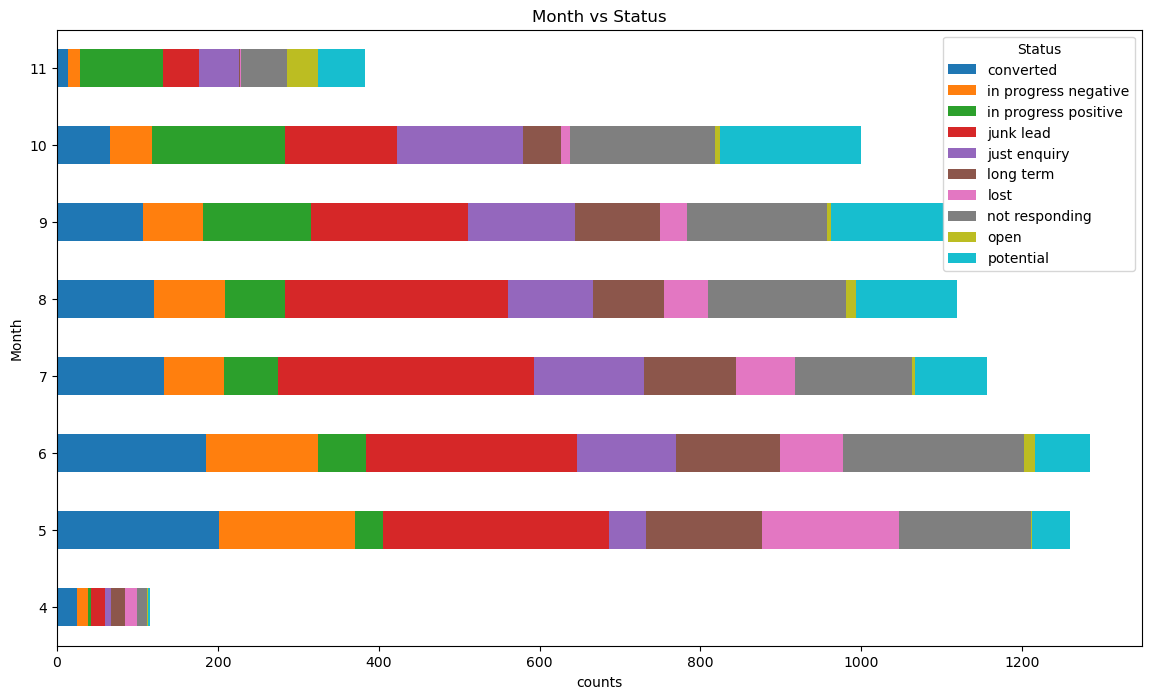

In [66]:
# Bar chart
Mon_status.plot(kind='barh', stacked=True, figsize=(14,8))
plt.title('Month vs Status')
plt.xlabel('counts')
plt.show()

In [67]:
# Checking the relationship of sales agent with status variable
sal_sta = pd.crosstab(df['Sales_Agent'], df['Status'])

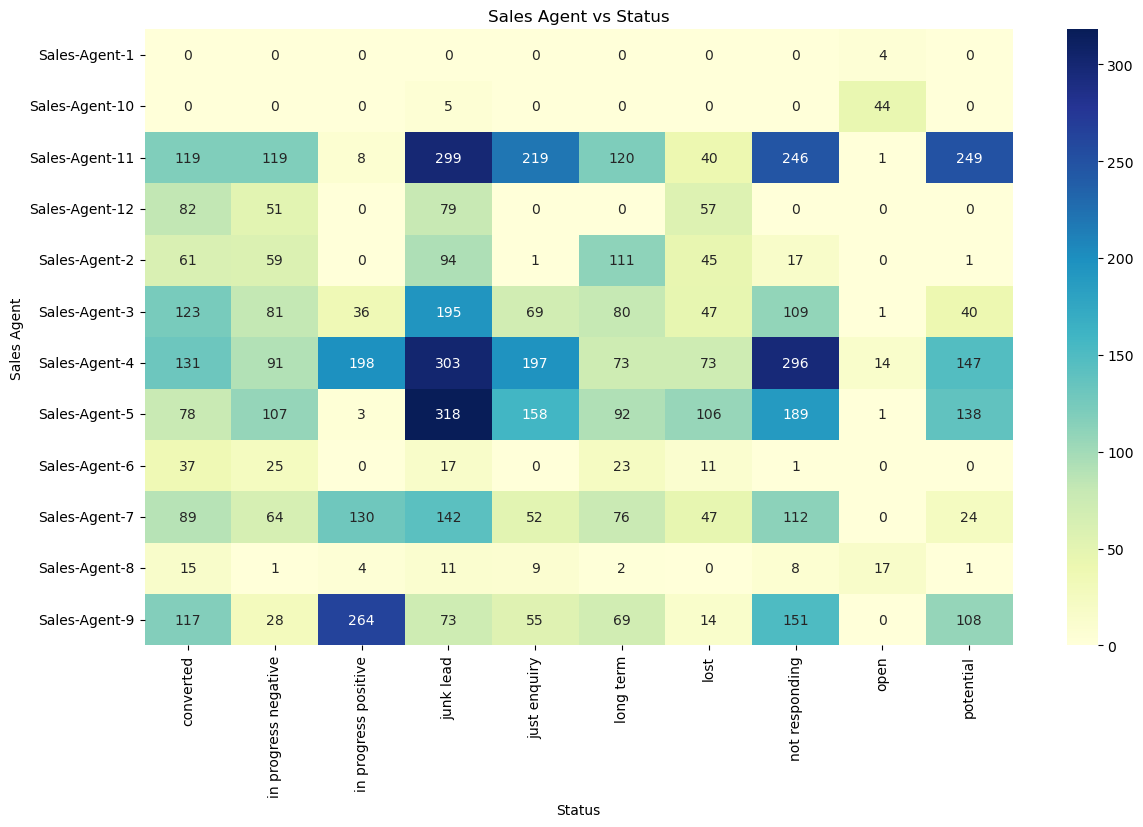

In [68]:
plt.figure(figsize=(14,8))
sns.heatmap(sal_sta, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Sales Agent vs Status')
plt.ylabel('Sales Agent')
plt.xlabel('Status')
plt.show()

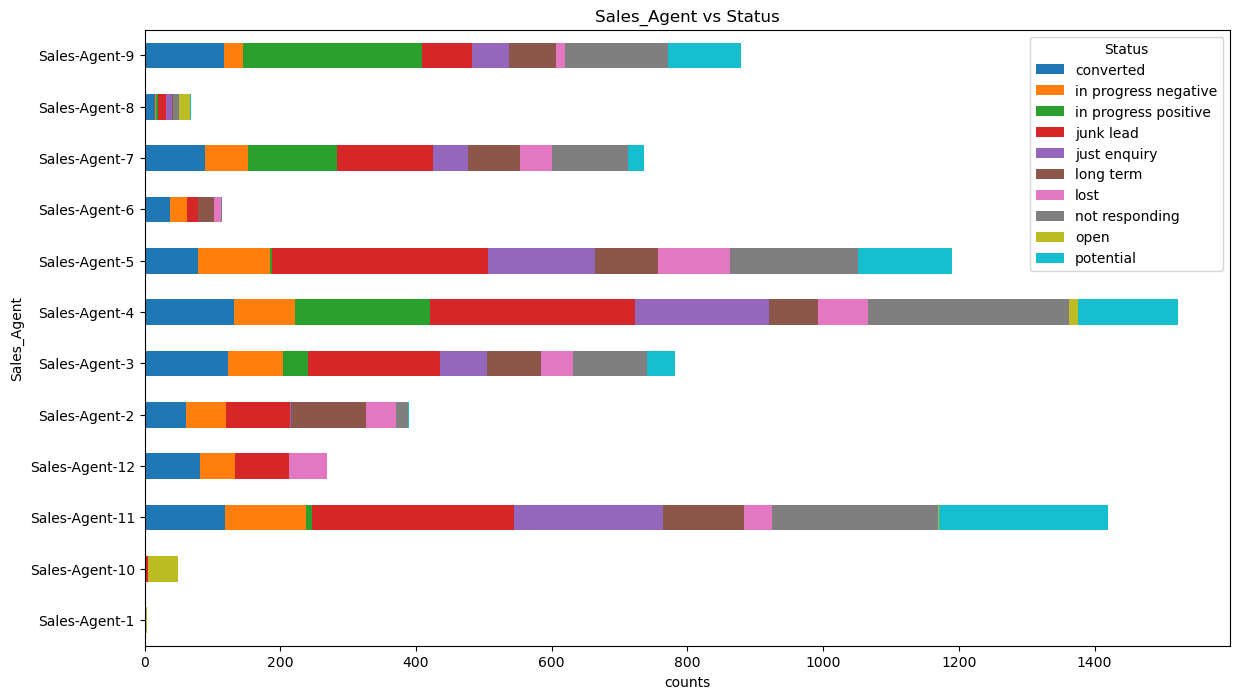

In [69]:
# Bar chart
sal_sta.plot(kind='barh', stacked=True, figsize=(14,8))
plt.title('Sales_Agent vs Status')
plt.xlabel('counts')
plt.show()

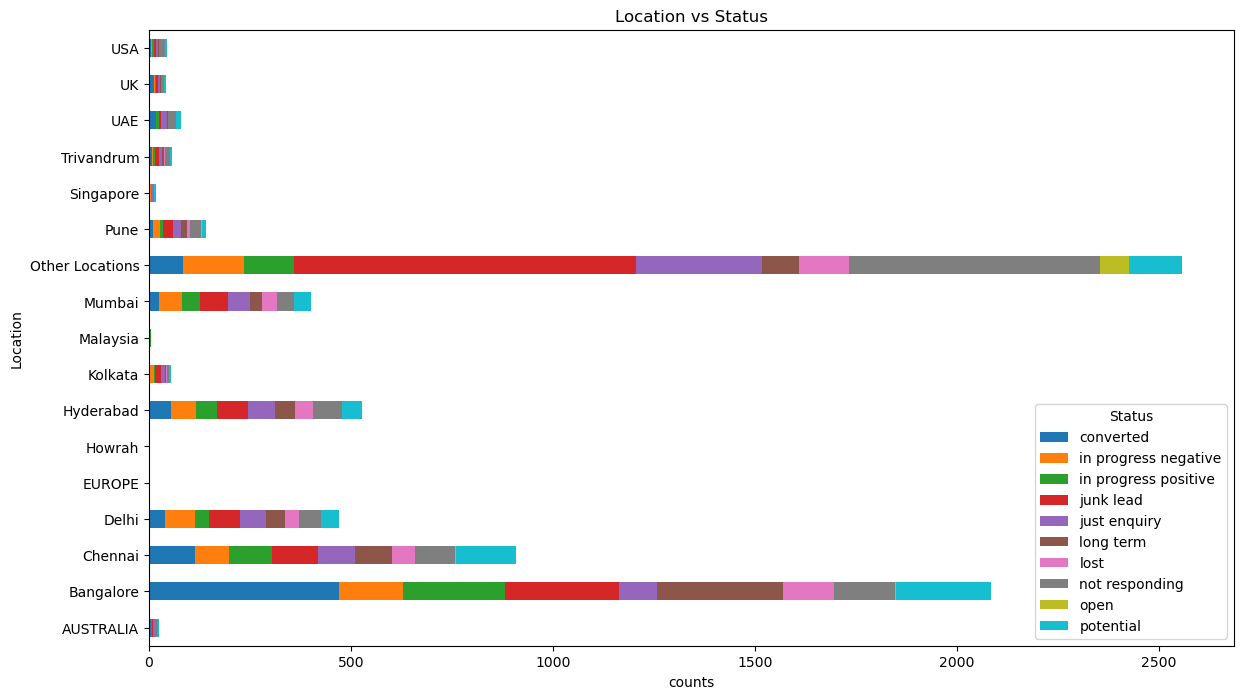

In [70]:
# Checking the relationship of location with status
loc_sta = pd.crosstab(df['Location'], df['Status'])
loc_sta.plot(kind='barh', stacked=True, figsize=(14,8))
plt.title('Location vs Status')
plt.xlabel('counts')
plt.show()

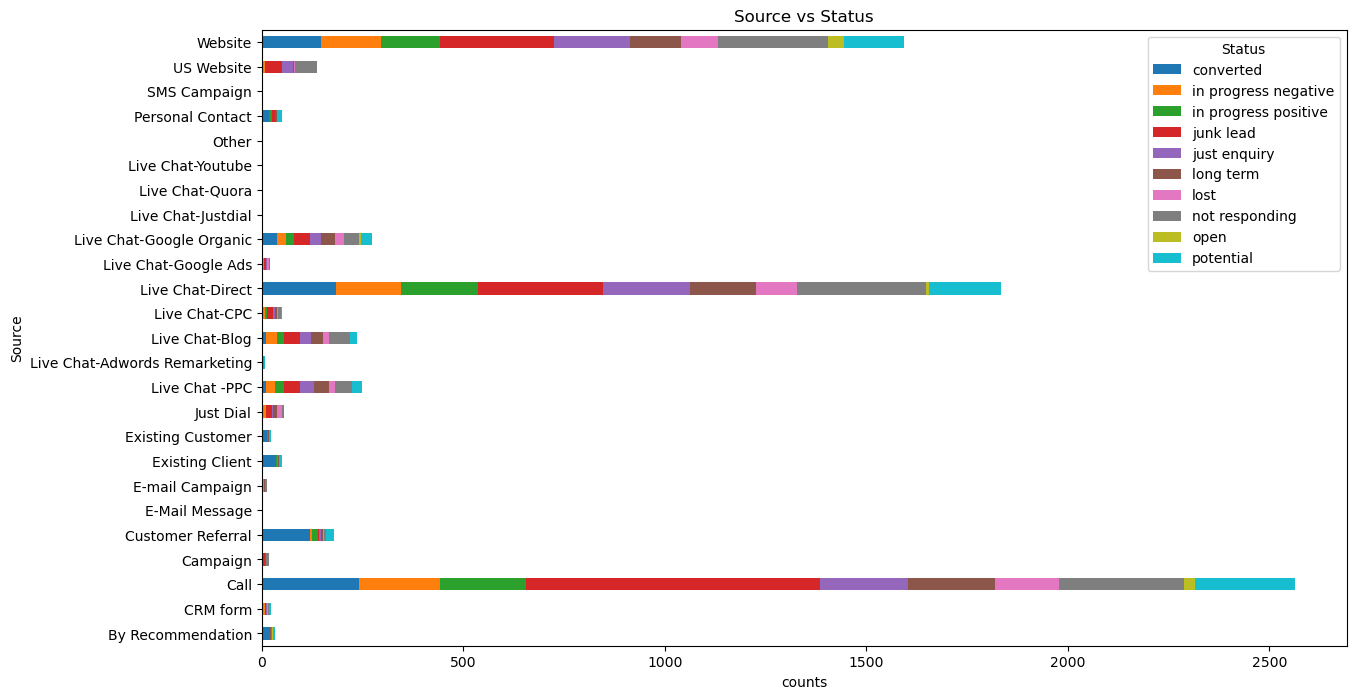

In [71]:
# Checking the relationship of source with status
Sou_sta = pd.crosstab(df['Source'], df['Status'])
Sou_sta.plot(kind='barh', stacked=True, figsize=(14,8))
plt.title('Source vs Status')
plt.xlabel('counts')
plt.show()

### Conclusion

May and June recorded the highest number of converted leads, while July saw a spike in junk leads.

Sales Agents 3 and 4 have the highest lead conversion rates, whereas Sales Agent 11 shows strong potential for converting leads.

Lead conversion rates are highest in Bangalore, whereas other locations tend to generate a larger share of junk leads.

Calls account for both the highest number of converted leads and the highest number of junk leads.



In [74]:
#### Mapping function
def map_status(status):
    if status in ['Potential', 'In Progress Positive', 'converted']:
        return 'High Potential'
    else:
        return 'Low Potential'

# Apply mapping
df['Lead_Potential'] = df['Status'].apply(map_status)


In [75]:
print(df['Lead_Potential'].value_counts())

Lead_Potential
Low Potential     6570
High Potential     852
Name: count, dtype: int64


In [76]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Weekday,Lead_Potential
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,open,11,14,10,Wednesday,Low Potential
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,open,11,14,9,Wednesday,Low Potential
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,open,11,14,9,Wednesday,Low Potential
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,open,11,14,8,Wednesday,Low Potential
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,open,11,14,7,Wednesday,Low Potential
...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,lost,4,28,9,Saturday,Low Potential
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,lost,4,28,9,Saturday,Low Potential
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,not responding,4,28,9,Saturday,Low Potential
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,just enquiry,4,28,8,Saturday,Low Potential


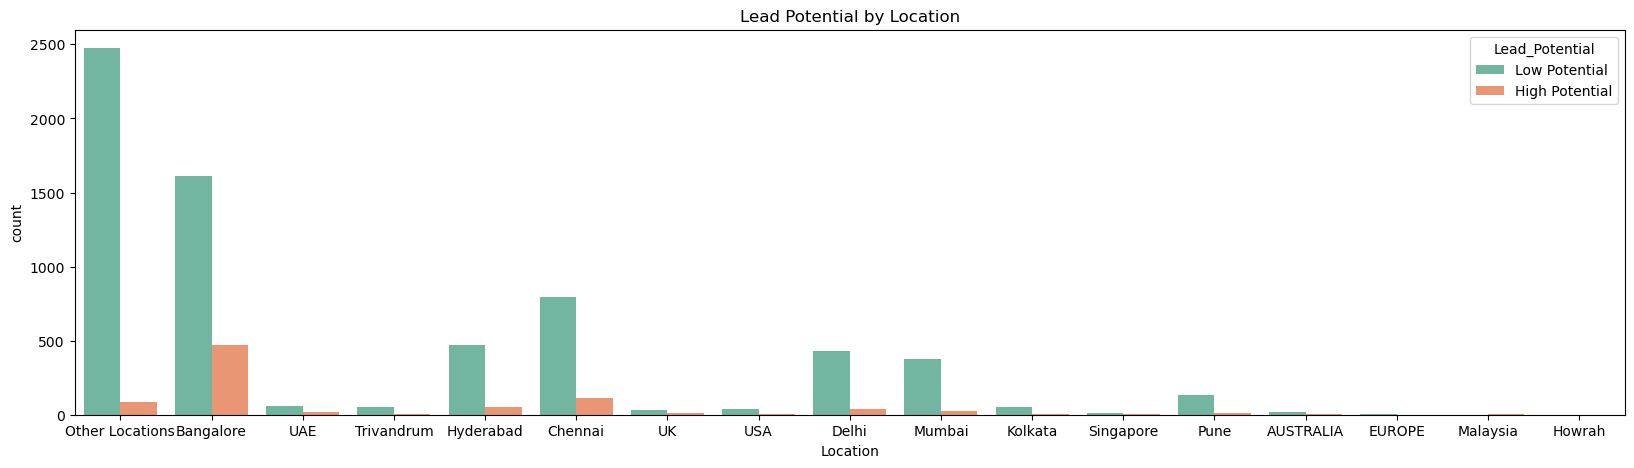

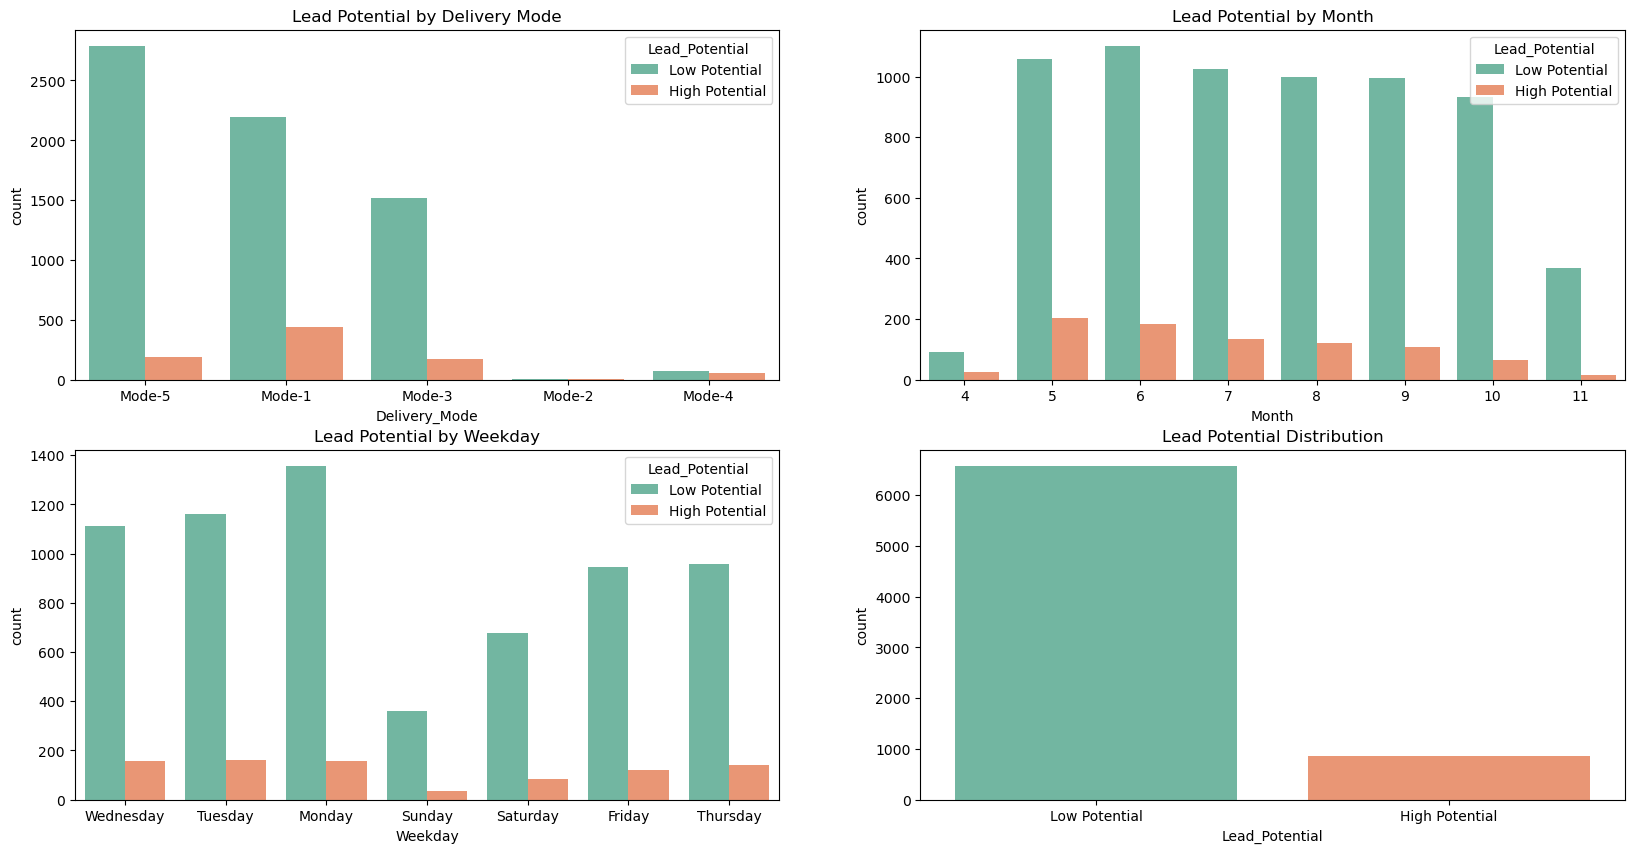

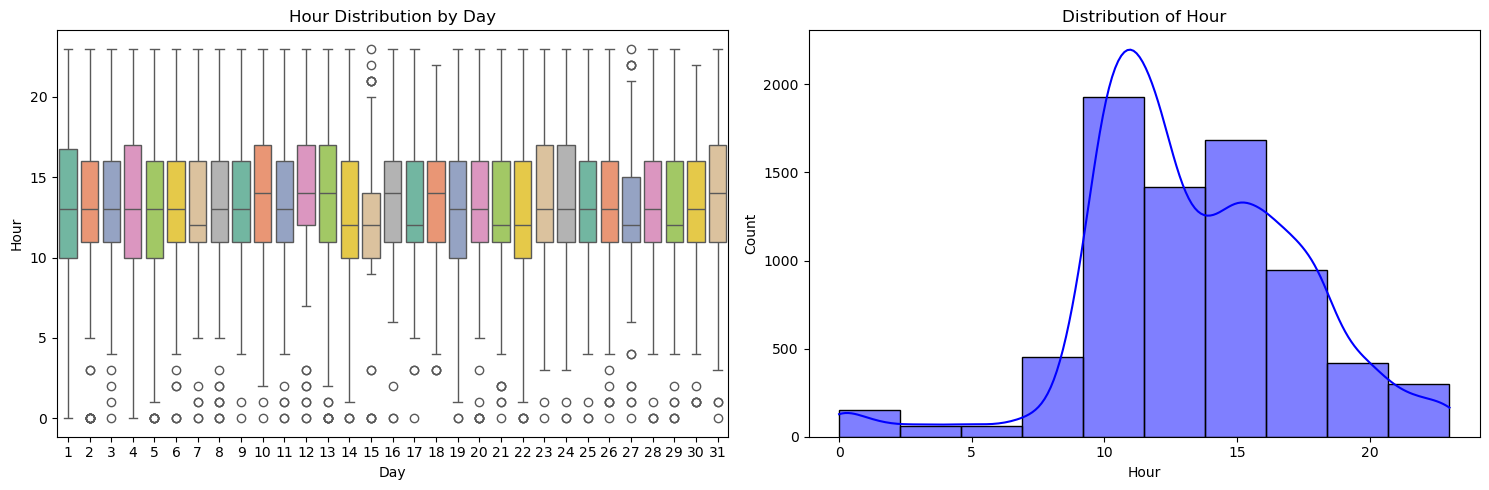

In [77]:
# Set the figure size

plt.figure(figsize=(20, 5))
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='Location', hue='Lead_Potential', palette='Set2')
plt.title('Lead Potential by Location')

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Delivery_Mode',hue='Lead_Potential', palette='Set2')
plt.title('Lead Potential by Delivery Mode')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Month',hue='Lead_Potential', palette='Set2')
plt.title('Lead Potential by Month')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Weekday',hue='Lead_Potential', palette='Set2')
plt.title('Lead Potential by Weekday')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Lead_Potential', palette='Set2')
plt.title('Lead Potential Distribution')

# Plotting numerical columns
plt.figure(figsize=(15, 5))

# Day vs Hour (optional)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Day', y='Hour', palette='Set2')
plt.title('Hour Distribution by Day')

plt.subplot(1, 2, 2)
sns.histplot(df['Hour'], kde=True, color='blue', bins=10)
plt.title('Distribution of Hour')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Encoding:

In [79]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols = ['Weekday','Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status','Lead_Potential']

# Initialize encoder
le = LabelEncoder()

# Encode each column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [80]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Weekday,Lead_Potential
0,18,24,2,10,4,8,11,14,10,6,1
1,18,24,1,10,4,8,11,14,9,6,1
2,18,24,1,10,4,8,11,14,9,6,1
3,18,24,1,10,4,8,11,14,8,6,1
4,18,24,1,10,4,8,11,14,7,6,1


### Correlation matrix

<Axes: >

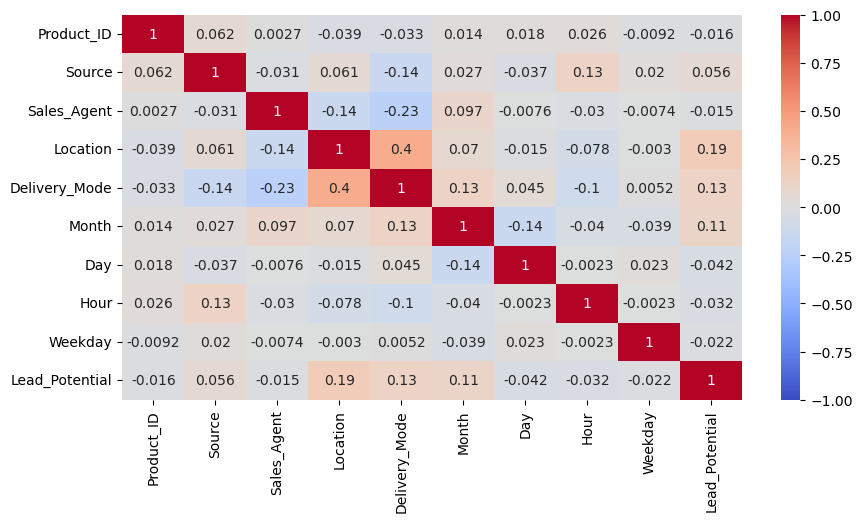

In [82]:
# finding the Co-relation among all features
correlation_matrix = df.drop('Status', axis=1).corr()

# Corelation Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

## Model Creation:

In [84]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop(['Lead_Potential','Status'], axis=1)
y = df['Lead_Potential']


# Split into 75% Train, 25% Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# importing the metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



### Before Balancing data

### 1. Logistic Regression:

In [88]:
# Create a Logistic Regression model object
model_lr = LogisticRegression()

# Fit the model to the training data
model_lr.fit(x_train, y_train)

# Predict
y_pred_lr = model_lr.predict(x_test)

In [89]:
# Logistic Regression evaluate metrics
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
lr_class_report = classification_report(y_test, y_pred_lr)

# print the metrics of Logistic Regression
print('Accuracy_Score         :', lr_acc)
print('Precision_Score        :', lr_precision)
print('Recall_Score           :', lr_recall)
print('F1_Score               :', lr_f1)
print('ROC_AUC                :', lr_roc_auc)
print('Confusion_Matrix       :\n', lr_conf_matrix)
print('Classification_Report  :\n', lr_class_report)

Accuracy_Score         : 0.8766163793103449
Precision_Score        : 0.8766163793103449
Recall_Score           : 1.0
F1_Score               : 0.9342520815389033
ROC_AUC                : 0.5
Confusion_Matrix       :
 [[   0  229]
 [   0 1627]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       229
           1       0.88      1.00      0.93      1627

    accuracy                           0.88      1856
   macro avg       0.44      0.50      0.47      1856
weighted avg       0.77      0.88      0.82      1856



### 2. Random Forest classifier:

In [91]:
# Create a Random Forest Classifier model object
model_rfc = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model_rfc.fit(x_train, y_train)

# Predict
y_pred_rfc = model_rfc.predict(x_test)

In [92]:
# Random Forest Classifier Evaluation Metrics
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)
rfc_f1 = f1_score(y_test, y_pred_rfc)
rfc_roc_auc = roc_auc_score(y_test, y_pred_rfc)
rfc_conf_matrix = confusion_matrix(y_test, y_pred_rfc)
rfc_class_report = classification_report(y_test, y_pred_rfc)

# print the metrices of RandomForestClassifier
print('Accuracy_Score         :', rfc_acc)
print('Precision_Score        :', rfc_precision)
print('Recall_Score           :', rfc_recall)
print('F1_Score               :', rfc_f1)
print('ROC_AUC                :', rfc_roc_auc)
print('Confusion_Matrix       :\n', rfc_conf_matrix)
print('Classification_Report  :\n', rfc_class_report)

Accuracy_Score         : 0.884698275862069
Precision_Score        : 0.891846921797005
Recall_Score           : 0.9883220651505839
F1_Score               : 0.9376093294460641
ROC_AUC                : 0.5683968404355539
Confusion_Matrix       :
 [[  34  195]
 [  19 1608]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.64      0.15      0.24       229
           1       0.89      0.99      0.94      1627

    accuracy                           0.88      1856
   macro avg       0.77      0.57      0.59      1856
weighted avg       0.86      0.88      0.85      1856



### 3. Support Vector System(SVC):

In [94]:
# Create SVC model object
model_svc = SVC()

# Fit the model to the training data
model_svc.fit(x_train, y_train)

# Predict
y_pred_svc = model_svc.predict(x_test)



In [95]:
# SVC Evaluate Metrics
svc_acc = accuracy_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc)
svc_recall = recall_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc)
svc_roc_auc = roc_auc_score(y_test, y_pred_svc)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_class_report = classification_report(y_test, y_pred_svc)


# print the metrices of SVC
print('Accuracy_Score         :', svc_acc)
print('Precision_Score        :', svc_precision)
print('Recall_Score           :', svc_recall)
print('F1_Score               :', svc_f1)
print('ROC_AUC                :', svc_roc_auc)
print('Confusion_Matrix       :\n', svc_conf_matrix)
print('Classification_Report  :\n', svc_class_report)

Accuracy_Score         : 0.8766163793103449
Precision_Score        : 0.8766163793103449
Recall_Score           : 1.0
F1_Score               : 0.9342520815389033
ROC_AUC                : 0.5
Confusion_Matrix       :
 [[   0  229]
 [   0 1627]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       229
           1       0.88      1.00      0.93      1627

    accuracy                           0.88      1856
   macro avg       0.44      0.50      0.47      1856
weighted avg       0.77      0.88      0.82      1856



### 4. Decision Tree Classifier:

In [97]:
# Create Decision Tree model object
model_dt = DecisionTreeClassifier()

# Fit the model to the training data
model_dt.fit(x_train, y_train)

# Predict
y_pred_dt = model_dt.predict(x_test)

In [98]:
# Decision Tree Evaluate Metrics 
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_class_report = classification_report(y_test, y_pred_dt)


# print the metrices of Decision Tree
print('Accuracy_Score         :', dt_acc)
print('Precision_Score        :', dt_precision)
print('Recall_Score           :', dt_recall)
print('F1_Score               :', dt_f1)
print('ROC_AUC                :', dt_roc_auc)
print('Confusion_Matrix       :\n', dt_conf_matrix)
print('Classification_Report  :\n', dt_class_report)

Accuracy_Score         : 0.8227370689655172
Precision_Score        : 0.8947688564476886
Recall_Score           : 0.9041180086047941
F1_Score               : 0.8994191378783247
ROC_AUC                : 0.5743297466604756
Confusion_Matrix       :
 [[  56  173]
 [ 156 1471]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.26      0.24      0.25       229
           1       0.89      0.90      0.90      1627

    accuracy                           0.82      1856
   macro avg       0.58      0.57      0.58      1856
weighted avg       0.82      0.82      0.82      1856



### 5. Gradient Boost Classifier:

In [100]:
# Create Gradient Boost model object
model_gb = GradientBoostingClassifier()

# Fit the model to the training data
model_gb.fit(x_train,y_train)

# Predict
y_pred_gb = model_gb.predict(x_test)


In [101]:
# GradientBoostingClassifier evaluate metrics
gb_acc = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
gb_class_report = classification_report(y_test, y_pred_gb)

# print the metrics of GradientBoostingClassifier
print('Accuracy_Score         :', gb_acc)
print('Precision_Score        :', gb_precision)
print('Recall_Score           :', gb_recall)
print('F1_Score               :', gb_f1)
print('ROC_AUC                :', gb_roc_auc)
print('Confusion_Matrix       :\n', gb_conf_matrix)
print('Classification_Report  :\n', gb_class_report)

Accuracy_Score         : 0.8841594827586207
Precision_Score        : 0.8917869034406215
Recall_Score           : 0.9877074370006146
F1_Score               : 0.9372995042286381
ROC_AUC                : 0.5680895263605693
Confusion_Matrix       :
 [[  34  195]
 [  20 1607]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.63      0.15      0.24       229
           1       0.89      0.99      0.94      1627

    accuracy                           0.88      1856
   macro avg       0.76      0.57      0.59      1856
weighted avg       0.86      0.88      0.85      1856



## Model Comparison Report(Before Balancing the Data):

In [103]:
print(" Model Comparison Report(Before Balancing the Data)")


# Create the dictionary with the data
M_Reports = {
    'Logistic Regression': {'Accuracy': lr_acc, 'Precision': lr_precision, 'Recall': lr_recall, 'F1-Score': lr_f1, 'ROC AUC': lr_roc_auc},
    
    'SVC': {'Accuracy': svc_acc, 'Precision': svc_precision, 'Recall': svc_recall, 'F1-Score': svc_f1, 'ROC AUC': svc_roc_auc},
    
    'Decision Tree': {'Accuracy': dt_acc, 'Precision': dt_precision, 'Recall': dt_recall, 'F1-Score': dt_f1, 'ROC AUC': dt_roc_auc},
    
    'RandomForestClassifier': {'Accuracy': rfc_acc, 'Precision': rfc_precision, 'Recall': rfc_recall, 'F1-Score': rfc_f1, 'ROC AUC': rfc_roc_auc},
    
    'Gradient Boosting Classifier': {'Accuracy': gb_acc, 'Precision': gb_precision, 'Recall': gb_recall, 'F1-Score': gb_f1, 'ROC AUC': gb_roc_auc}
            }

# Create the DataFrame and transpose it
M_Reports_T = pd.DataFrame(M_Reports).T

# Print the DataFrame
M_Reports_T

 Model Comparison Report(Before Balancing the Data)


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.876616,0.876616,1.000000,0.934252,0.500000
SVC,0.876616,0.876616,1.000000,0.934252,0.500000
Decision Tree,0.822737,0.894769,0.904118,0.899419,0.574330
RandomForestClassifier,0.884698,0.891847,0.988322,0.937609,0.568397
Gradient Boosting Classifier,0.884159,0.891787,0.987707,0.937300,0.568090


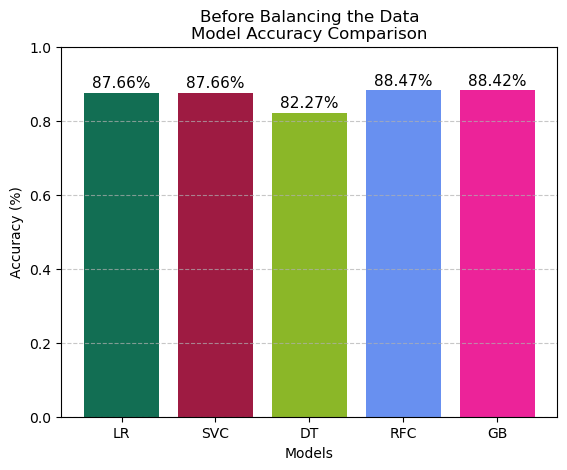

Before Balancing the data - Best Model based on Accuracy is: Random Forest


In [104]:
# Assuming you have the models and accuracies lists (as percentages)
models = ['LR','SVC', 'DT', 'RFC','GB']
accuracies = [lr_acc,svc_acc, dt_acc, rfc_acc,gb_acc]

# Create the bar plot
plt.bar(models, accuracies, color=['#126e53', '#9e1b42', '#8bb728', '#6890F0','#ec2399'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')             
plt.title('Before Balancing the Data\nModel Accuracy Comparison')

# Add data labels (accuracy percentages) on top of each bar
for idx, value in enumerate(accuracies):
    plt.text(idx, value + 0.005, f"{value*100:.2f}%", ha='center', va='bottom', fontsize=11)  # Adjust vertical offset
    
plt.ylim(0, 1)              # Set y-axis limit to 0-1 for accuracy percentages
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

# Find the index of the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))

# Define the list of model names
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest','Gradient Boosting']

# Get the name of the best model
best_model = model_names[best_model_index]

# print the best model among all
print(f"Before Balancing the data - Best Model based on Accuracy is: {best_model}")


## Balancing the Data

In [106]:
y.value_counts()

Lead_Potential
1    6570
0     852
Name: count, dtype: int64

### SMOTE Technique implementation

In [108]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Split data first
x = df.drop(['Lead_Potential', 'Status'], axis=1)  # features
y = df['Lead_Potential']                           # target

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Step 2: Apply SMOTE only on training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", x_train.shape, y_train.value_counts())
print("After SMOTE:", x_train_smote.shape, y_train_smote.value_counts())

Before SMOTE: (5566, 9) Lead_Potential
1    4927
0     639
Name: count, dtype: int64
After SMOTE: (9854, 9) Lead_Potential
1    4927
0    4927
Name: count, dtype: int64


### MODELS AFTER BALANCING THE DATA:

### 1. Logistic Regression

In [111]:
# Initialize model
model_after_lr = LogisticRegression()

# Train on SMOTE data
model_after_lr.fit(x_train_smote, y_train_smote)

# Predict on test
y_pred_after_lr = model_after_lr.predict(x_test)

In [112]:
# Logistic Regression evaluate metrics
lr_acc_smote = accuracy_score(y_test, y_pred_after_lr)
lr_precision_smote = precision_score(y_test, y_pred_after_lr)
lr_recall_smote = recall_score(y_test, y_pred_after_lr)
lr_f1_smote = f1_score(y_test, y_pred_after_lr)
lr_roc_auc_smote = roc_auc_score(y_test, y_pred_after_lr)
lr_conf_matrix_smote = confusion_matrix(y_test, y_pred_after_lr)
lr_class_report_smote = classification_report(y_test, y_pred_after_lr)

# print the metrics of Logistic Regression
print('Accuracy_Score         :', lr_acc_smote)
print('Precision_Score        :', lr_precision_smote)
print('Recall_Score           :', lr_recall_smote)
print('F1_Score               :', lr_f1_smote)
print('ROC_AUC                :', lr_roc_auc_smote)
print('Confusion_Matrix       :\n', lr_conf_matrix_smote)
print('Classification_Report  :\n', lr_class_report_smote)

Accuracy_Score         : 0.6745689655172413
Precision_Score        : 0.9383966244725739
Recall_Score           : 0.6768107121119903
F1_Score               : 0.7864214992927864
ROC_AUC                : 0.6670438537085773
Confusion_Matrix       :
 [[ 140   73]
 [ 531 1112]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.21      0.66      0.32       213
           1       0.94      0.68      0.79      1643

    accuracy                           0.67      1856
   macro avg       0.57      0.67      0.55      1856
weighted avg       0.85      0.67      0.73      1856



### 2. Random Forest Classifier

In [114]:
# Initialize model
model_after_rfc = RandomForestClassifier(random_state=42)

# Train on SMOTE data
model_after_rfc.fit(x_train_smote, y_train_smote)

# Predict on test
y_pred_after_rfc = model_after_rfc.predict(x_test)

In [115]:
# Random Forest Classifier Evaluation Metrics
rfc_acc_smote = accuracy_score(y_test, y_pred_after_rfc)
rfc_precision_smote = precision_score(y_test, y_pred_after_rfc)
rfc_recall_smote = recall_score(y_test, y_pred_after_rfc)
rfc_f1_smote= f1_score(y_test, y_pred_after_rfc)
rfc_roc_auc_smote = roc_auc_score(y_test, y_pred_after_rfc)
rfc_conf_matrix_smote = confusion_matrix(y_test, y_pred_after_rfc)
rfc_class_report_smote = classification_report(y_test, y_pred_after_rfc)

# print the metrices of RandomForestClassifier
print('Accuracy_Score         :', rfc_acc_smote)
print('Precision_Score        :', rfc_precision_smote)
print('Recall_Score           :', rfc_recall_smote)
print('F1_Score               :', rfc_f1_smote)
print('ROC_AUC                :', rfc_roc_auc_smote)
print('Confusion_Matrix       :\n', rfc_conf_matrix_smote)
print('Classification_Report  :\n', rfc_class_report_smote)

Accuracy_Score         : 0.8588362068965517
Precision_Score        : 0.9254467036352434
Recall_Score           : 0.9141813755325624
F1_Score               : 0.9197795468462951
ROC_AUC                : 0.6730531290808353
Confusion_Matrix       :
 [[  92  121]
 [ 141 1502]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.39      0.43      0.41       213
           1       0.93      0.91      0.92      1643

    accuracy                           0.86      1856
   macro avg       0.66      0.67      0.67      1856
weighted avg       0.86      0.86      0.86      1856



### 3. Support Vector System(SVC)

In [117]:
# Initialize model
model_after_svc = SVC()

# Train on SMOTE data
model_after_svc.fit(x_train_smote, y_train_smote)

# Predict on test
y_pred_after_svc = model_after_svc.predict(x_test)

In [118]:
# SVC Evaluate Metrics
svc_acc_smote = accuracy_score(y_test, y_pred_after_svc)
svc_precision_smote = precision_score(y_test,y_pred_after_svc)
svc_recall_smote = recall_score(y_test, y_pred_after_svc)
svc_f1_smote= f1_score(y_test, y_pred_after_svc)
svc_roc_auc_smote= roc_auc_score(y_test,y_pred_after_svc)
svc_conf_matrix_smote = confusion_matrix(y_test, y_pred_after_svc)
svc_class_report_smote= classification_report(y_test, y_pred_after_svc)

# print the metrices of SVC
print('Accuracy_Score         :', svc_acc_smote)
print('Precision_Score        :', svc_precision_smote)
print('Recall_Score           :', svc_recall_smote)
print('F1_Score               :', svc_f1_smote)
print('ROC_AUC                :', svc_roc_auc_smote)
print('Confusion_Matrix       :\n', svc_conf_matrix_smote)
print('Classification_Report  :\n', svc_class_report_smote)

Accuracy_Score         : 0.6788793103448276
Precision_Score        : 0.9447748513169074
Recall_Score           : 0.6768107121119903
F1_Score               : 0.7886524822695036
ROC_AUC                : 0.6858231964315821
Confusion_Matrix       :
 [[ 148   65]
 [ 531 1112]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.22      0.69      0.33       213
           1       0.94      0.68      0.79      1643

    accuracy                           0.68      1856
   macro avg       0.58      0.69      0.56      1856
weighted avg       0.86      0.68      0.74      1856



### 4. Decision Tree Classifier

In [120]:
# Initialize model
model_after_dt =  DecisionTreeClassifier()

# Train on SMOTE data
model_after_dt.fit(x_train_smote, y_train_smote)

# Predict on test
y_pred_after_dt = model_after_dt.predict(x_test)


In [121]:
# Decision Tree Evaluate Metrics 
dt_acc_smote = accuracy_score(y_test, y_pred_after_dt)
dt_precision_smote = precision_score(y_test, y_pred_after_dt)
dt_recall_smote = recall_score(y_test, y_pred_after_dt)
dt_f1_smote = f1_score(y_test, y_pred_after_dt)
dt_roc_auc_smote = roc_auc_score(y_test, y_pred_after_dt)
dt_conf_matrix_smote = confusion_matrix(y_test, y_pred_after_dt)
dt_class_report_smote = classification_report(y_test, y_pred_after_dt)


# print the metrices of Decision Tree
print('Accuracy_Score         :', dt_acc_smote)
print('Precision_Score        :', dt_precision_smote)
print('Recall_Score           :', dt_recall_smote)
print('F1_Score               :', dt_f1_smote)
print('ROC_AUC                :', dt_roc_auc_smote)
print('Confusion_Matrix       :\n', dt_conf_matrix_smote)
print('Classification_Report  :\n', dt_class_report_smote)

Accuracy_Score         : 0.796875
Precision_Score        : 0.9186507936507936
Recall_Score           : 0.8454047474132684
F1_Score               : 0.8805071315372425
ROC_AUC                : 0.6339699793404371
Confusion_Matrix       :
 [[  90  123]
 [ 254 1389]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.26      0.42      0.32       213
           1       0.92      0.85      0.88      1643

    accuracy                           0.80      1856
   macro avg       0.59      0.63      0.60      1856
weighted avg       0.84      0.80      0.82      1856



### 5. Gradient Boosting Classifier

In [123]:
# Initialize model
model_after_gb =  GradientBoostingClassifier()

# Train on SMOTE data
model_after_gb.fit(x_train_smote, y_train_smote)

# Predict on test
y_pred_after_gb = model_after_gb.predict(x_test)


In [124]:
# Gradient Boosting Evaluate Metrics 
gb_acc_smote = accuracy_score(y_test, y_pred_after_gb)
gb_precision_smote = precision_score(y_test, y_pred_after_gb)
gb_recall_smote = recall_score(y_test, y_pred_after_gb)
gb_f1_smote = f1_score(y_test, y_pred_after_gb)
gb_roc_auc_smote = roc_auc_score(y_test, y_pred_after_gb)
gb_conf_matrix_smote = confusion_matrix(y_test, y_pred_after_gb)
gb_class_report_smote = classification_report(y_test, y_pred_after_gb)


# print the metrices of Decision Tree
print('Accuracy_Score         :', gb_acc_smote)
print('Precision_Score        :', gb_precision_smote)
print('Recall_Score           :', gb_recall_smote)
print('F1_Score               :', gb_f1_smote)
print('ROC_AUC                :', gb_roc_auc_smote)
print('Confusion_Matrix       :\n', gb_conf_matrix_smote)
print('Classification_Report  :\n', gb_class_report_smote)

Accuracy_Score         : 0.8006465517241379
Precision_Score        : 0.9321113374066531
Recall_Score           : 0.8356664637857577
F1_Score               : 0.8812580231065469
ROC_AUC                : 0.6830914478553202
Confusion_Matrix       :
 [[ 113  100]
 [ 270 1373]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.30      0.53      0.38       213
           1       0.93      0.84      0.88      1643

    accuracy                           0.80      1856
   macro avg       0.61      0.68      0.63      1856
weighted avg       0.86      0.80      0.82      1856



### Model Comparison Report(After Balancing the Data):

In [126]:
print("Model Comparison Report(After Balancing the Data)")

# Create the dictionary with the data
M_Reports_b = {
    'Logistic Regression': {'Accuracy': lr_acc_smote, 'Precision': lr_precision_smote, 'Recall': lr_recall_smote, 'F1-Score': lr_f1_smote, 'ROC AUC': lr_roc_auc_smote},
    
    'SVC': {'Accuracy': svc_acc_smote, 'Precision': svc_precision_smote, 'Recall': svc_recall_smote, 'F1-Score': svc_f1_smote, 'ROC AUC': svc_roc_auc_smote},
    
    'Decision Tree': {'Accuracy': dt_acc_smote, 'Precision': dt_precision_smote, 'Recall': dt_recall_smote, 'F1-Score': dt_f1_smote, 'ROC AUC': dt_roc_auc_smote},
    
    'RandomForestClassifier': {'Accuracy': rfc_acc_smote, 'Precision': rfc_precision_smote, 'Recall': rfc_recall_smote, 'F1-Score': rfc_f1_smote, 'ROC AUC': rfc_roc_auc_smote},
    
    'Gradient Boosting Classifier': {'Accuracy': gb_acc_smote, 'Precision': gb_precision_smote, 'Recall': gb_recall_smote, 'F1-Score': gb_f1_smote, 'ROC AUC': gb_roc_auc_smote}
            }

# Create the DataFrame and transpose it
M_Reports_b_T = pd.DataFrame(M_Reports_b).T

# Print the DataFrame
M_Reports_b_T

Model Comparison Report(After Balancing the Data)


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.674569,0.938397,0.676811,0.786421,0.667044
SVC,0.678879,0.944775,0.676811,0.788652,0.685823
Decision Tree,0.796875,0.918651,0.845405,0.880507,0.633970
RandomForestClassifier,0.858836,0.925447,0.914181,0.919780,0.673053
Gradient Boosting Classifier,0.800647,0.932111,0.835666,0.881258,0.683091


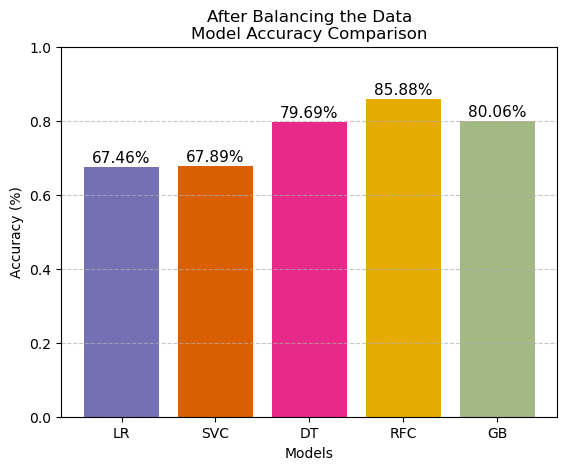

After Balancing the data - Best Model based on Accuracy is: Random Forest


In [127]:
# Assuming you have the models and accuracies lists (as percentages)
models_b = ['LR', 'SVC', 'DT', 'RFC','GB']
accuracies_b = [lr_acc_smote,svc_acc_smote, dt_acc_smote, rfc_acc_smote,gb_acc_smote]

# Create the bar plot
plt.bar(models_b, accuracies_b, color=['#7570b3', '#d95f02', '#e7298a', '#e6ab02','#a3b984'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')             
plt.title('After Balancing the Data\nModel Accuracy Comparison')

# Add data labels (accuracy percentages) on top of each bar
for idx, value in enumerate(accuracies_b):
    plt.text(idx, value + 0.005, f"{value*100:.2f}%", ha='center', va='bottom', fontsize=11)  # Adjust vertical offset
    
plt.ylim(0, 1)              # Set y-axis limit to 0-1 for accuracy percentages
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

# Find the index of the model with the highest accuracy
best_model_index = accuracies_b.index(max(accuracies_b))

# Define the list of model names
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest','Gradient Boosting']

# Get the name of the best model
best_model = model_names[best_model_index]

# print the best model among all
print(f"After Balancing the data - Best Model based on Accuracy is: {best_model}")

## Crossvalidations

In [129]:
# Create Kfold and StratifiedKfold objects for crossvalidation
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 1. Logistic Regression

In [131]:
# Initialize the LogisticRegression model for cross-validation
lr_model = LogisticRegression(random_state=42)

# Perform Cross-Validation on Accuracy scores
lr_scores = cross_val_score(lr_model, x, y, cv=kfold, scoring='accuracy')   # Use 'accuracy' or other metrics

# Perform Stratified K-Fold Cross-Validation
lr_stratified_scores = cross_val_score(lr_model, x, y, cv=stratified_kfold, scoring='accuracy')

# Print Cross-Validation of Accuracy Scores
print("K-Fold Cross-Validation Scores:", lr_scores)
print("Mean Accuracy:", lr_scores.mean())

# Print Cross-Validation of Stratified Scores
print("\nK-Fold Cross-Validation Scores:", lr_stratified_scores)
print("Mean Accuracy:", lr_stratified_scores.mean())

K-Fold Cross-Validation Scores: [0.87811448 0.87811448 0.89555256 0.88544474 0.88881402]
Mean Accuracy: 0.8852080553967345

K-Fold Cross-Validation Scores: [0.88484848 0.88484848 0.88544474 0.88544474 0.88544474]
Mean Accuracy: 0.8852062403005799


### 2. Random Forest Classifier

In [133]:
# Initialize the RandomForestClassifier model for cross-validation
rfc_model = RandomForestClassifier()

# Perform Cross-Validation on Accuracy scores
rfc_scores = cross_val_score(rfc_model, x, y, cv=kfold, scoring='accuracy')   # Use 'accuracy' or other metrics

# Perform Stratified K-Fold Cross-Validation
rfc_stratified_scores = cross_val_score(rfc_model, x, y, cv=stratified_kfold, scoring='accuracy')

# Print Cross-Validation of Accuracy Scores
print("K-Fold Cross-Validation Scores:\n",rfc_scores)
print("Mean Accuracy:", rfc_scores.mean())

# Print Cross-Validation of Stratified Scores
print("\nK-Fold Cross-Validation Scores:\n",rfc_stratified_scores)
print("Mean Accuracy:", rfc_stratified_scores.mean())

K-Fold Cross-Validation Scores:
 [0.89023569 0.88350168 0.89690027 0.88948787 0.89420485]
Mean Accuracy: 0.8908660731302241

K-Fold Cross-Validation Scores:
 [0.88686869 0.89158249 0.89555256 0.88746631 0.88679245]
Mean Accuracy: 0.8896524998411792


### 3. Support Vector System(SVC)

In [135]:
# Initialize the SVC model for cross-validation
svc_model = SVC(random_state=42)

# Perform Cross-Validation on Accuracy scores
svc_scores = cross_val_score(svc_model, x, y, cv=kfold, scoring='accuracy')   # Use 'accuracy' or other metrics

# Perform Stratified K-Fold Cross-Validation
svc_stratified_scores = cross_val_score(svc_model, x, y, cv=stratified_kfold, scoring='accuracy')

# Print Cross-Validation of Accuracy Scores
print("K-Fold Cross-Validation Scores:\n",svc_scores)
print("Mean Accuracy:", svc_scores.mean())

# Print Cross-Validation of Stratified Scores
print("\nK-Fold Cross-Validation Scores:\n",svc_stratified_scores)
print("Mean Accuracy:", svc_stratified_scores.mean())

K-Fold Cross-Validation Scores:
 [0.87811448 0.87811448 0.89555256 0.88544474 0.88881402]
Mean Accuracy: 0.8852080553967345

K-Fold Cross-Validation Scores:
 [0.88484848 0.88484848 0.88544474 0.88544474 0.88544474]
Mean Accuracy: 0.8852062403005799


### 4. Decision Tree Classifier

In [137]:
# Initialize the DecisionTree model for cross-validation
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Cross-Validation on Accuracy scores
dt_scores = cross_val_score(dt_model, x, y, cv=kfold, scoring='accuracy')   # Use 'accuracy' or other metrics

# Perform Stratified K-Fold Cross-Validation
dt_stratified_scores = cross_val_score(dt_model, x, y, cv=stratified_kfold, scoring='accuracy')


# Print Cross-Validation of Accuracy Scores
print("K-Fold Cross-Validation Scores:\n",dt_scores)
print("Mean Accuracy:", dt_scores.mean())

# Print Cross-Validation of Stratified Scores
print("\nK-Fold Cross-Validation Scores:\n",dt_stratified_scores)
print("Mean Accuracy:", dt_stratified_scores.mean())

K-Fold Cross-Validation Scores:
 [0.83569024 0.81548822 0.84838275 0.81603774 0.82277628]
Mean Accuracy: 0.8276750433354207

K-Fold Cross-Validation Scores:
 [0.83232323 0.81885522 0.82210243 0.82749326 0.83153639]
Mean Accuracy: 0.82646210533003


### 5. Gradient Boosting Classifier

In [139]:
# Initialize the DecisionTree model for cross-validation
gb_model = GradientBoostingClassifier(random_state=42)

# Perform Cross-Validation on Accuracy scores
gb_scores = cross_val_score(gb_model, x, y, cv=kfold, scoring='accuracy')   # Use 'accuracy' or other metrics

# Perform Stratified K-Fold Cross-Validation
gb_stratified_scores = cross_val_score(gb_model, x, y, cv=stratified_kfold, scoring='accuracy')


# Print Cross-Validation of Accuracy Scores
print("K-Fold Cross-Validation Scores:\n",gb_scores)
print("Mean Accuracy:", gb_scores.mean())

# Print Cross-Validation of Stratified Scores
print("\nK-Fold Cross-Validation Scores:\n",gb_stratified_scores)
print("Mean Accuracy:", gb_stratified_scores.mean())

K-Fold Cross-Validation Scores:
 [0.88686869 0.88350168 0.90700809 0.89420485 0.89622642]
Mean Accuracy: 0.8935619446940202

K-Fold Cross-Validation Scores:
 [0.88686869 0.8969697  0.89690027 0.89083558 0.89083558]
Mean Accuracy: 0.8924819624819624


In [140]:
# Assuming the provided variables are defined as follows:
models = {"Logistic Regression": lr_model, "Random Forest": rfc_model,"SVC":svc_model, 
          "Decision Tree": dt_model,"Gradient Boosting":gb_model
         }

scores = {"Logistic Regression": lr_scores, "Random Forest": rfc_scores, "SVC":svc_scores,
          "Decision Tree": dt_scores,"Gradient Boosting":gb_scores
         }

stratified_scores = {"Logistic Regression": lr_stratified_scores, "Random Forest": rfc_stratified_scores,
              "SVC":svc_stratified_scores, "Decision Tree": dt_stratified_scores,"Gradient Boosting": gb_stratified_scores
             }

# Step 1: Prepare data for the table
results = []

for model_name in models.keys():
    results.append({
        "Model": model_name,
        "Mean_Accuracy": scores[model_name].mean(),
        "Mean_Stratified_Scores": stratified_scores[model_name].mean()
    })

# Step 2: Create a DataFrame
results_df = pd.DataFrame(results)

# Step 3: Display the table
results_df

,Model,Mean_Accuracy,Mean_Stratified_Scores
0,Logistic Regression,0.885208,0.885206
1,Random Forest,0.890866,0.889652
2,SVC,0.885208,0.885206
3,Decision Tree,0.827675,0.826462
4,Gradient Boosting,0.893562,0.892482


## Hyperparameter Tuning:

In [142]:
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


## 1. Random Forest Classifier

In [144]:
# Define the hyperparameter grid for Random Forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]  # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']                                             # maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]                  # List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]                                              # minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]                                                # minimum number of samples required to be at a leaf node
bootstrap = [True, False]                                                # sampling

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

# Create a Random Forest Classifier with a fixed random state
rfc = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
rfc_rscv = RandomizedSearchCV(estimator=rfc, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV on the training data
rfc_rscv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [145]:
print("Best Hyperparameters:", rfc_rscv.best_params_)
print("Best F1-Score:", rfc_rscv.best_score_)

Best Hyperparameters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best F1-Score: 0.9421306972877432


In [146]:
# Define a Random Forest Classifier with specific hyperparameters
rfc_hat = RandomForestClassifier(n_estimators = 1200,
 min_samples_split = 5,
 min_samples_leaf =2 ,
 max_features = 'sqrt',
 max_depth =10 ,
 bootstrap = False)

# Fit the Random Forest model on the preprocessed data
rfc_hat.fit(x_train_smote, y_train_smote)

# Predict labels for the test data using the fitted RandomForest
y_pred_hat_rfc = rfc_hat.predict(x_test)

In [147]:
# RandomForest Evaluate metrics
rfc_accuracy_hat = accuracy_score(y_test, y_pred_hat_rfc)
rfc_precision_hat = precision_score(y_test, y_pred_hat_rfc)
rfc_recall_hat = recall_score(y_test, y_pred_hat_rfc)
rfc_f1_hat = f1_score(y_test, y_pred_hat_rfc)
rfc_roc_auc_hat = roc_auc_score(y_test, y_pred_hat_rfc)
rfc_conf_matrix_hat = confusion_matrix(y_test, y_pred_hat_rfc)
rfc_class_report_hat = classification_report(y_test, y_pred_hat_rfc)


print('Accuracy_Score         :', rfc_accuracy_hat)
print('Precision_Score        :', rfc_precision_hat)
print('Recall_Score           :', rfc_recall_hat)
print('F1_Score               :', rfc_f1_hat)
print('ROC_AUC                :', rfc_roc_auc_hat)
print('Confusion_Matrix       :\n', rfc_conf_matrix_hat)
print('Classification_Report  :\n', rfc_class_report_hat)

Accuracy_Score         : 0.8168103448275862
Precision_Score        : 0.9352037408149633
Recall_Score           : 0.852099817407182
F1_Score               : 0.89171974522293
ROC_AUC                : 0.6983503781871591
Confusion_Matrix       :
 [[ 116   97]
 [ 243 1400]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.32      0.54      0.41       213
           1       0.94      0.85      0.89      1643

    accuracy                           0.82      1856
   macro avg       0.63      0.70      0.65      1856
weighted avg       0.86      0.82      0.84      1856



## 2. Decision Tree Classifier

In [149]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":('gini', 'entropy'),        # quality of split
    "splitter":('best', 'random'),          # searches the features for a split
    'max_depth':(list(range(1,20))),        # depth of tree range from 1 to 19
    "min_samples_split":[2,3,4],            # the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1,20))    # minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

# Create a DecisionTree model
dt = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dt, params, scoring='f1', cv=5, verbose=3, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=3)

In [150]:
# Print the best hyperparameters and best score after the grid search
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}
Best F1-Score: 0.9429916603001139


In [151]:
dt_hat = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 6, min_samples_split= 2, splitter= 'best')

# Fit the DecisionTree model on the preprocessed data
dt_hat.fit(x_train_smote, y_train_smote)

# Predict labels for the test data using the fitted DecisionTree
y_pred_hat_dt = dt_hat.predict(x_test)

In [152]:
# DecisionTree Evaluate metrics
dt_accuracy_hat = accuracy_score(y_test, y_pred_hat_dt)
dt_precision_hat = precision_score(y_test, y_pred_hat_dt)
dt_recall_hat = recall_score(y_test, y_pred_hat_dt)
dt_f1_hat = f1_score(y_test, y_pred_hat_dt)
dt_roc_auc_hat = roc_auc_score(y_test, y_pred_hat_dt)
dt_conf_matrix_hat = confusion_matrix(y_test, y_pred_hat_dt)
dt_class_report_hat = classification_report(y_test, y_pred_hat_dt)


print('Accuracy_Score         :', dt_accuracy_hat)
print('Precision_Score        :', dt_precision_hat)
print('Recall_Score           :', dt_recall_hat)
print('F1_Score               :', dt_f1_hat)
print('ROC_AUC                :', dt_roc_auc_hat)
print('Confusion_Matrix       :\n', dt_conf_matrix_hat)
print('Classification_Report  :\n', dt_class_report_hat)

Accuracy_Score         : 0.6740301724137931
Precision_Score        : 0.9398305084745763
Recall_Score           : 0.674984783931832
F1_Score               : 0.785688983351045
ROC_AUC                : 0.6708257252992494
Confusion_Matrix       :
 [[ 142   71]
 [ 534 1109]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.21      0.67      0.32       213
           1       0.94      0.67      0.79      1643

    accuracy                           0.67      1856
   macro avg       0.57      0.67      0.55      1856
weighted avg       0.86      0.67      0.73      1856



## 3. Support vector Classifier

In [154]:
# Define the hyperparameter search space for the SVM classifier
param_grid = {'C':[0.1, 0.01, 0.001, 0.0001], 'gamma':[0.1, 0.01, 0.001, 0.0001]}
print('param_grid:', param_grid)

# Create a GridSearchCV object to tune the SVM hyperparameters
grid = GridSearchCV(svc_model, param_grid, scoring='f1', cv=5, verbose=3)

# Fit the GridSearchCV on the training data
grid.fit(x_train, y_train)

param_grid: {'C': [0.1, 0.01, 0.001, 0.0001], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   0.8s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   0.8s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   0.8s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   1.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   0.8s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.939 total time=   0.3s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.939 total time=   0.4s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.939 total time=   0.3s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.939 total time=   0.3s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.939 total time=   0.3s
[CV 1/5] END ................C=0.1, gamma=0.00

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [155]:
print("Best Hyperparameters:", grid.best_params_)
print("Best F1-Score:", grid.best_score_)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1}
Best F1-Score: 0.9391022316267194


In [156]:
# Define the SVC model with hyperparameters based on GridSearchCV
svc_hat = SVC(C=0.1, gamma=0.1)

# Fit the SVC model on the preprocessed data (potentially using SMOTE)
svc_hat.fit(x_train_smote, y_train_smote)

# Predict labels for the test data using the fitted SVC model
y_pred_hat_svc = svc_hat.predict(x_test)

In [157]:
# SVC Evaluate Metrics
svc_accuracy_hat = accuracy_score(y_test, y_pred_hat_svc)
svc_precision_hat = precision_score(y_test, y_pred_hat_svc)
svc_recall_hat = recall_score(y_test, y_pred_hat_svc)
svc_f1_hat = f1_score(y_test, y_pred_hat_svc)
svc_roc_auc_hat = roc_auc_score(y_test, y_pred_hat_svc)
svc_conf_matrix_hat = confusion_matrix(y_test, y_pred_hat_svc)
svc_class_report_hat = classification_report(y_test, y_pred_hat_svc)


print('Accuracy_Score         :', svc_accuracy_hat)
print('Precision_Score        :', svc_precision_hat)
print('Recall_Score           :', svc_recall_hat)
print('F1_Score               :', svc_f1_hat)
print('ROC_AUC                :', svc_roc_auc_hat)
print('Confusion_Matrix       :\n', svc_conf_matrix_hat)
print('Classification_Report  :\n', svc_class_report_hat)

Accuracy_Score         : 0.8577586206896551
Precision_Score        : 0.9025102159953299
Recall_Score           : 0.9409616555082166
F1_Score               : 0.9213349225268176
ROC_AUC                : 0.5784620484113854
Confusion_Matrix       :
 [[  46  167]
 [  97 1546]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.32      0.22      0.26       213
           1       0.90      0.94      0.92      1643

    accuracy                           0.86      1856
   macro avg       0.61      0.58      0.59      1856
weighted avg       0.84      0.86      0.85      1856



## 4. Logistic Regression

In [159]:
# Define the hyperparameter grid for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]} 

# Create a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter for better convergence

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, 
                          param_grid=param_grid, 
                          scoring='f1', 
                          cv=5, 
                          verbose=2) 

# Fit the GridSearchCV object on the training data
grid_search.fit(x_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='f1',
             verbose=2)

In [160]:
# Print the best hyperparameters and best score for Logistic Regression
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.001}
Best F1-Score: 0.9391022316267194


In [161]:
## Train the Model with Best Hyperparameters

# Create a Logistic Regression model with the best hyperparameters
log_reg_hat = LogisticRegression(C=0.001, max_iter=1000) 

# Fit the model on the training data
log_reg_hat.fit(x_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_hat_log_reg = log_reg_hat.predict(x_test)

In [162]:
# Logistic Regression evaluate metrics
lr_accuracy_hat = accuracy_score(y_test, y_pred_hat_log_reg)
lr_precision_hat = precision_score(y_test, y_pred_hat_log_reg)
lr_recall_hat = recall_score(y_test, y_pred_hat_log_reg)
lr_f1_hat = f1_score(y_test, y_pred_hat_log_reg)
lr_roc_auc_hat = roc_auc_score(y_test, y_pred_hat_log_reg)
lr_conf_matrix_hat = confusion_matrix(y_test, y_pred_hat_log_reg)
lr_class_report_hat = classification_report(y_test, y_pred_hat_log_reg)


print('Accuracy_Score         :', lr_accuracy_hat)
print('Precision_Score        :', lr_precision_hat)
print('Recall_Score           :', lr_recall_hat)
print('F1_Score               :', lr_f1_hat)
print('ROC_AUC                :', lr_roc_auc_hat)
print('Confusion_Matrix       :\n', lr_conf_matrix_hat)
print('Classification_Report  :\n', lr_class_report_hat)

Accuracy_Score         : 0.6761853448275862
Precision_Score        : 0.9422750424448217
Recall_Score           : 0.6755934266585514
F1_Score               : 0.7869549805033677
ROC_AUC                : 0.6781723001837358
Confusion_Matrix       :
 [[ 145   68]
 [ 533 1110]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.21      0.68      0.33       213
           1       0.94      0.68      0.79      1643

    accuracy                           0.68      1856
   macro avg       0.58      0.68      0.56      1856
weighted avg       0.86      0.68      0.73      1856



## 5. Gradient Boosting Classifier

In [164]:
# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create a Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier()

# Create a GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_clf,
                              param_grid=param_grid_gb,
                              scoring='f1',
                              cv=5,
                              verbose=2)

# Fit the GridSearchCV object on the training data
grid_search_gb.fit(x_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='f1', verbose=2)

In [165]:
# Print the best hyperparameters and best score
print("Best Hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best F1-Score for Gradient Boosting:", grid_search_gb.best_score_)

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best F1-Score for Gradient Boosting: 0.9419384521716102


In [166]:
# Create the Gradient Boosting model with best hyperparameters
gb_clf_hat = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 50)

# Fit the model on the SMOTE training data
gb_clf_hat.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_hat_gb = gb_clf_hat.predict(x_test)

In [167]:
# Evaluate
gb_accuracy_hat = accuracy_score(y_test, y_pred_hat_gb)
gb_precision_hat = precision_score(y_test, y_pred_hat_gb)
gb_recall_hat = recall_score(y_test, y_pred_hat_gb)
gb_f1_hat = f1_score(y_test, y_pred_hat_gb)
gb_roc_auc_hat = roc_auc_score(y_test, y_pred_hat_gb)
gb_conf_matrix_hat = confusion_matrix(y_test, y_pred_hat_gb)
gb_class_report_hat = classification_report(y_test, y_pred_hat_gb)

print('Accuracy_Score         :', gb_accuracy_hat)
print('Precision_Score        :', gb_precision_hat)
print('Recall_Score           :', gb_recall_hat)
print('F1_Score               :', gb_f1_hat)
print('ROC_AUC                :', gb_roc_auc_hat)
print('Confusion_Matrix       :\n', gb_conf_matrix_hat)
print('Classification_Report  :\n', gb_class_report_hat)


Accuracy_Score         : 0.7731681034482759
Precision_Score        : 0.9389367816091954
Recall_Score           : 0.7954960438222763
F1_Score               : 0.8612850082372323
ROC_AUC                : 0.6982175054792134
Confusion_Matrix       :
 [[ 128   85]
 [ 336 1307]]
Classification_Report  :
               precision    recall  f1-score   support

           0       0.28      0.60      0.38       213
           1       0.94      0.80      0.86      1643

    accuracy                           0.77      1856
   macro avg       0.61      0.70      0.62      1856
weighted avg       0.86      0.77      0.81      1856



## Hyperparameter Tuning Models Comparison Report

In [169]:
print( "Hyperparameter Tuning Models Comparison Report")


# Create the dictionary with the data
M_Reports = {
    'Logistic Regression': {'Accuracy': lr_accuracy_hat, 'Precision': lr_precision_hat, 'Recall': lr_recall_hat, 'F1-Score': lr_f1_hat, 'ROC AUC': lr_roc_auc_hat},
    
    'SVC': {'Accuracy': svc_accuracy_hat, 'Precision': svc_precision_hat, 'Recall': svc_recall_hat, 'F1-Score': svc_f1_hat, 'ROC AUC': svc_roc_auc_hat},
    
    'Decision Tree': {'Accuracy': dt_accuracy_hat, 'Precision': dt_precision_hat, 'Recall': dt_recall_hat, 'F1-Score': dt_f1_hat, 'ROC AUC': dt_roc_auc_hat},
    
    'RandomForestClassifier': {'Accuracy': rfc_accuracy_hat, 'Precision': rfc_precision_hat, 'Recall': rfc_recall_hat, 'F1-Score': rfc_f1_hat, 'ROC AUC': rfc_roc_auc_hat},
    
    'Gradient Boosting Classifier': {'Accuracy': gb_accuracy_hat, 'Precision': gb_precision_hat, 'Recall': gb_recall_hat, 'F1-Score': gb_f1_hat, 'ROC AUC': gb_roc_auc_hat}
            }

# Create the DataFrame and transpose it
M_Reports_T = pd.DataFrame(M_Reports).T

# Print the DataFrame
M_Reports_T

Hyperparameter Tuning Models Comparison Report


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.676185,0.942275,0.675593,0.786955,0.678172
SVC,0.857759,0.902510,0.940962,0.921335,0.578462
Decision Tree,0.674030,0.939831,0.674985,0.785689,0.670826
RandomForestClassifier,0.816810,0.935204,0.852100,0.891720,0.698350
Gradient Boosting Classifier,0.773168,0.938937,0.795496,0.861285,0.698218


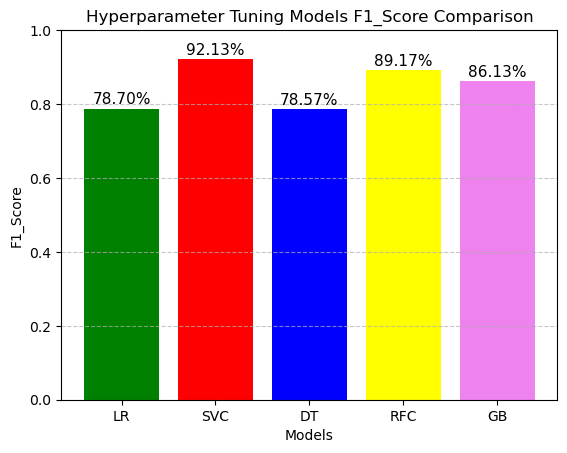

Hyperparamenter Tuning - Best Fit Model based on F1_Score is: SVC


In [170]:
# Assuming you have the models and accuracies lists (as percentages)
models = ['LR', 'SVC', 'DT', 'RFC','GB']
accuracies = [lr_f1_hat, svc_f1_hat, dt_f1_hat, rfc_f1_hat, gb_f1_hat]

# Create the bar plot
plt.bar(models, accuracies, color=['green', 'red', 'blue', 'yellow','violet'])
plt.xlabel('Models')
plt.ylabel('F1_Score')             
plt.title('Hyperparameter Tuning Models F1_Score Comparison')

# Add data labels (F1 percentages) on top of each bar
for idx, value in enumerate(accuracies):
    plt.text(idx, value + 0.005, f"{value*100:.2f}%", ha='center', va='bottom', fontsize=11)  # Adjust vertical offset
    
plt.ylim(0, 1)              # Set y-axis limit to 0-1 for accuracy percentages
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

# Find the index of the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))

# Define the list of model names
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest','Gradient Boosting']

# Get the name of the best model
best_model = model_names[best_model_index]

# print the best model among all
print(f"Hyperparamenter Tuning - Best Fit Model based on F1_Score is: {best_model}")

## Final conclusion

### Before Balancing the Data

Highest Accuracy: Random Forest (88.47%), closely followed by Gradient Boosting (88.42%).

Best F1-Score: Random Forest (0.9376) — indicates excellent balance between precision and recall.

Perfect Recall: Logistic Regression and SVC (1.0), but both have poor ROC AUC (0.5), implying weak class separation.

Lowest Performer: Decision Tree underperforms across all metrics.

Conclusion: Random Forest is the best overall performer due to high accuracy, recall, F1-score, and better ROC AUC than other models.

### After Balancing the Data (SMOTE)

Best Overall: Random Forest — top in Accuracy (85.88%), F1-Score (0.92), and Recall (91.4%).

High Precision Models: SVC (94.48%) and Gradient Boosting (93.27%).

Most Balanced: Gradient Boosting — performs strongly across all key metrics.

Conclusion: Random Forest remains top performer. Gradient Boosting is a reliable alternative.

### Cross-Validation Insights

Top Accuracy: Gradient Boosting (89.36%) slightly outperforms Random Forest (89.01%).

Most Consistent: Logistic Regression and SVC deliver identical and stable cross-validation results.

Overall Best Performer: Random Forest for strong metrics; Gradient Boosting leads in cross-validation accuracy.

Conclusion: Random Forest for classification strength; Gradient Boosting for cross-validation stability.

### Post Hyperparameter Tuning

Top Accuracy & F1: SVC leads with 85.78% accuracy and 0.9213 F1-Score.

Best ROC AUC: Gradient Boosting (0.6982) — superior class separation.

Well-Rounded Model: Random Forest maintains high precision and recall with solid AUC.

Conclusion: SVC for precision-driven tasks, Gradient Boosting or Random Forest for balanced, stable performance.



### Conclusion:

Random Forest Classifier has High Accuracy, Recall, and F1-Score across all stages.

Strong performance before and after SMOTE

Reliable ROC AUC